# Introduction
In this practical, we implement and train a feed-forward neural network (also known as an "MLP" for "multi-layer perceptron") on a dataset called "Fashion MNIST", consisting of small greyscale images of items of fashion.

# Learning Objectives

* Understand how to use Keras Layers to build a neural network architecture
* Understand how a model is trained and evaluated
* Understand the concept of train/validation/test split and why it's useful

In [1]:
pip install tensorflow

In [2]:
pip install tensorflow-gpu

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.11.0 requires tensorboard<2.12,>=2.11, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you have tensorflow-estimator 2.10.0 which is incompatible.



  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.0
    Uninstalling tensorboard-2.11.0:
      Successfully uninstalled tensorboard-2.11.0
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0


In [14]:
conda update conda


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\ZIGUI



In [15]:
conda update anaconda


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\ZIGUI



In [4]:
pip install keras

In [139]:
from __future__ import print_function
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data
In this practical, we use the Fashion MNIST dataset consisting of 70,000 greyscale images and their labels. The dataset is divided
 into 60,000 training images and 10,000 test images. The idea is to train a **classifier** to identify the class value (what type of fashion item it is) given the image. We train and *tune* a model on the 60,000 training images and then evaluate how well it classifies the 10,000 test images that the model did not see during training. This task is an example of a **supervised learning** problem, where we are given both input and labels (targets) to learn from. This is in contrast to **unsupervised learning** where we only have inputs from which to learn patterns or **reinforcement learning** where an agent learns how to maximise a reward signal through interaction with its environment. 

![Texte alternatif…](https://res.cloudinary.com/practicaldev/image/fetch/s---fNWEeWA--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

# Train/Validation/Test Split

When we build machine learning models, the goal is to build a model that will perform well on future data that we have not seen yet. We say that we want our models to be able to generalise well from whatever training data we can collect and do have available, to whatever data we will be applying them to in future. To do this, we split whatever data we have available into a training set, a validation set and a test set. The idea is that we train our model and use the performance on the validation set to make any adjustments to the model and its hyperparameters, but then we report the final accuracy on the test set. The test set (which we never train on), therefore acts as a proxy for our future data.

In [140]:
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [141]:
# Construct a validation set from the last 10000 images and labels from 
# train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:]

# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000]

In [142]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

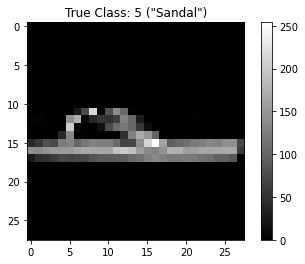

In [143]:
plt.figure()
random_index = np.random.randint(0, len(train_images))
plt.imshow(train_images[random_index], cmap='gray')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False)

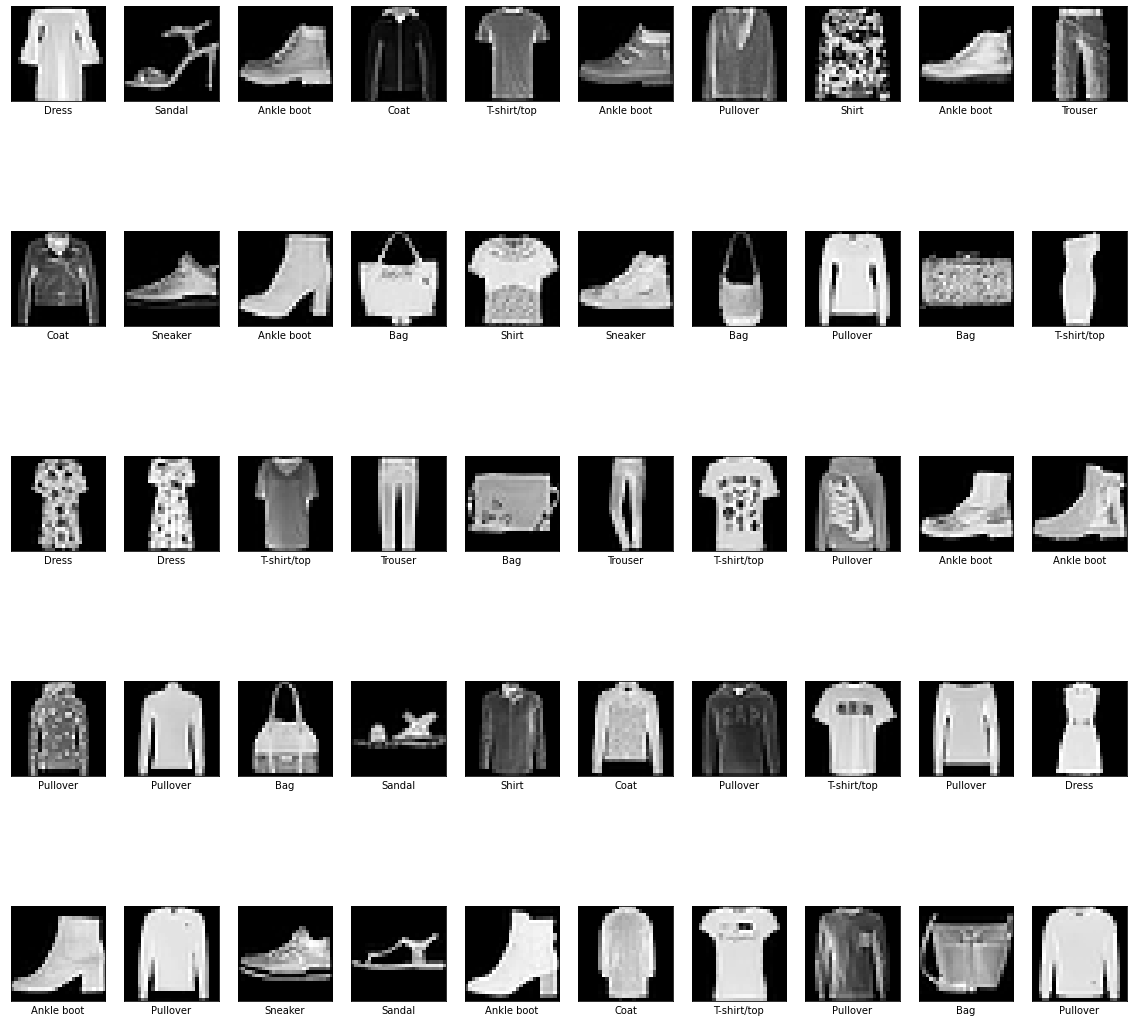

In [144]:
# Another view, showing 50 randomly selected images at a time
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap=plt.cm.gray)
    plt.xlabel(text_labels[train_labels[img_index]])

# Preprocess

In [145]:
# Flatten

train_images_flatten = train_images.reshape(train_images.shape[0], 784)
validation_images_flatten = validation_images.reshape(validation_images.shape[0], 784)
test_images_flatten = test_images.reshape(test_images.shape[0], 784)

In [146]:
# Normalize inputs from [0; 255] to [0; 1]

train_images_model = train_images_flatten.astype('float32')/255
validation_images_model = validation_images_flatten.astype('float32')/255
test_images_model = test_images_flatten.astype('float32')/255

In [147]:
# convert class vectors to binary class matrices
train_labels_categ = keras.utils.to_categorical(train_labels, 10)
validation_labels_categ = keras.utils.to_categorical(validation_labels, 10)
test_labels_categ = keras.utils.to_categorical(test_labels, 10)

# Train

In [148]:
batch_size = 128
num_classes = 10
epochs = 40

# Create a sequential model here 
model= Sequential([
Dense(256, input_dim = 784, activation='relu'),
Dropout (0.2),
Dense(128),
Dense(10, activation='softmax') ])

# End Code
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 256)               200960    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_48 (Dense)            (None, 128)               32896     
                                                                 
 dense_49 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [149]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_images_model, train_labels_categ,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images_model, validation_labels_categ))


Epoch 1/40
391/391 [==============================] - 12s 21ms/step - loss: 0.5954 - accuracy: 0.7866 - val_loss: 0.4285 - val_accuracy: 0.8421
Epoch 2/40
391/391 [==============================] - 8s 20ms/step - loss: 0.4161 - accuracy: 0.8482 - val_loss: 0.4648 - val_accuracy: 0.8271
Epoch 3/40
391/391 [==============================] - 8s 20ms/step - loss: 0.3792 - accuracy: 0.8622 - val_loss: 0.5183 - val_accuracy: 0.8078
Epoch 4/40
391/391 [==============================] - 8s 20ms/step - loss: 0.3523 - accuracy: 0.8720 - val_loss: 0.3799 - val_accuracy: 0.8607
Epoch 5/40
391/391 [==============================] - 9s 22ms/step - loss: 0.3345 - accuracy: 0.8773 - val_loss: 0.3767 - val_accuracy: 0.8673
Epoch 6/40
391/391 [==============================] - 8s 20ms/step - loss: 0.3170 - accuracy: 0.8841 - val_loss: 0.3584 - val_accuracy: 0.8737
Epoch 7/40
391/391 [==============================] - 8s 20ms/step - loss: 0.3074 - accuracy: 0.8852 - val_loss: 0.4145 - val_accuracy: 0.851

KeyboardInterrupt: 

# Test

In [ ]:
score = model.evaluate(test_images_model, test_labels_categ, verbose=0)
print('Test accuracy:', score[1])
# You should be able to get,at least, 88% accuracy

In [56]:
test_logits = model.predict(test_images_flatten)

313/313 [==============================] - 2s 4ms/step


In [57]:
test_logits

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
test_predictions = np.argmax(test_logits, axis=1)

In [60]:
test_predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

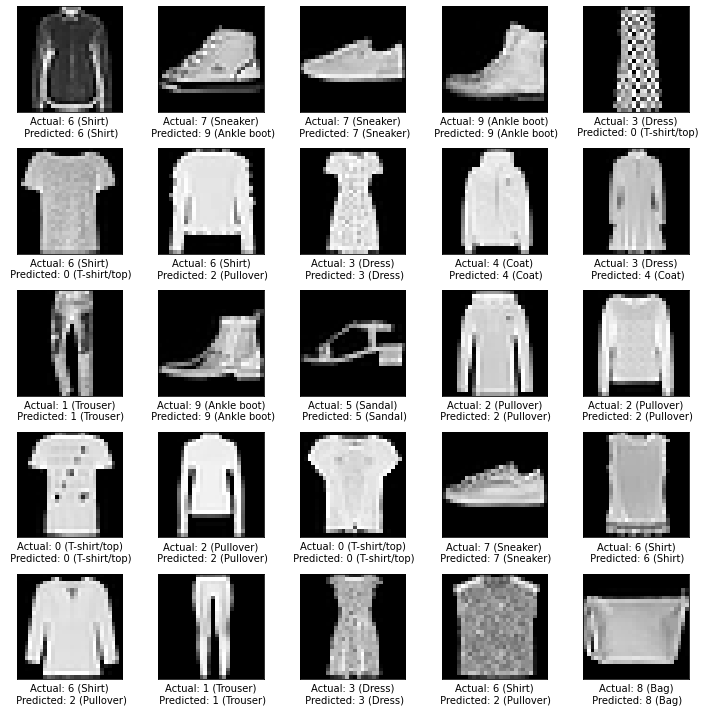

In [62]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 10000)
    plt.imshow(test_images[img_index], cmap=plt.cm.gray)
    
    test_predictions = tf.argmax(test_logits, axis=1, output_type=tf.int32)
    actual_label = int(test_labels[img_index])
    predicted_label = int(test_predictions[img_index])
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label]
    ))
    
plt.tight_layout()
plt.show()